# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [2]:
import pandas as pd
import numpy as np

In [3]:
RANDOM_STATE = 47

In [4]:
df = pd.read_csv('calidad_vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Si obsevamos la tabla de la descripción estadística de los datos, notamos que los valores extremos de la variable "total sulfur dioxide" están muy alejados de la media, mientras que los valores de la densidad apenas varían.



TEMINAR

In [25]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

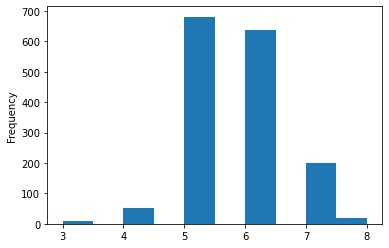

In [26]:
df['quality'].plot.hist();

In [27]:
df['quality'].mean()

5.6360225140712945

In [28]:
df['quality'].std()

0.8075694397347023

En el histograma de arriba, que relaciona la calidad del vino con el número de vinos con dicha calidad, la variable que representa la calidad de los vinos sigue una distribución normal con una media de: 5.64 y una desviación típica de: 0.8. Esto en palabras se traduce a que lo más común a la hora de calificar un vino es que a este se le asigne un 5 o un 6. También puede obtener un 7 aunque no es tan común, y el resto de valores tienen mucha menos probabilidad de ser los valores elegidos como puntuación de los vinos.

A continuación mostramos una serie de diagramas de dispersiónde relación de todas las variables. La última fila corresponde a la calidad.

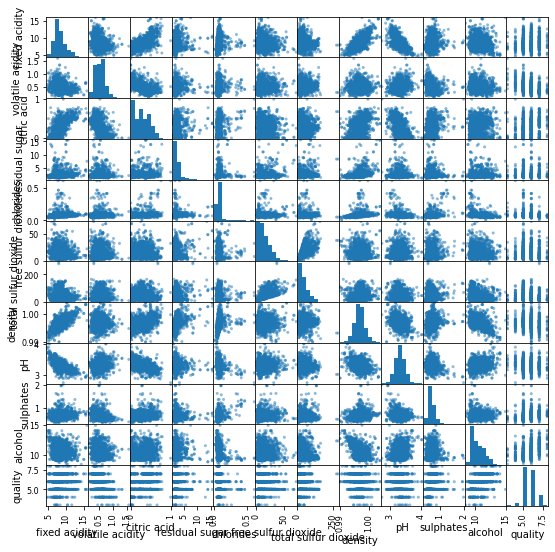

In [29]:
disp = pd.plotting.scatter_matrix( 
    df, 
    figsize = (9,9), 
    diagonal = 'hist')

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad y, selecciona las variables que estén más correlacionadas con ella (estableciendo para ello un valor umbral que consideres adecuado).

In [30]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


La tabla anterior muestra el couficiente de Pearson entre todas las variables. Para hacer este análisis tendremos en cuenta solo la última fila, que relaciona la calidad con el resto de variables.

Calculando los coeficientes de Pearson entre todas las variables y la calidad, vemos que ninguna supera el +- 0.5, por lo que no hay ninguna variable que tenga una fuerte correlación positiva o negativa. Sin embargo, sí vemos que la variable "alcohol" alcanza la mayor correlación con la "calidad". También observamos que "volatile acidity" tiene una correlación negativa de -0.4 aproximadamente. Teniendo en cuenta que los valores de correlación son muy bajos, aquellos que estén entre 0,15 y el -0,15 no las tendremos encuenta a la hora de medir la calidad. Por lo tanto tendremos en cuenta las siguientes variables para medir la calidad: Subirán la calidad los valores altos de acidez cítrica, los sulfatos y, en especial, el nivel de alcohol. Así mismo, la calidad empeorará si suben los niveles de dioxido de sulfato total, densidad y destacamos la acidez volatil. Por tanto no tendremos en cuenta las clases: azucar residual, dioxido de azufre libre, pH, acidez fija y cloruros.

In [5]:
df1 = df.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'fixed acidity', 'chlorides'], axis=1)
df1

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,0.645,0.12,44.0,0.99547,0.71,10.2,5


En el nuevo dataframe vemos como hemos quitado las clases que no superaban el umbral que hemos establecido previamente. Veremos luego cuando utilicemos las redes neuronales si la decisión sobre la elección del umbral ha sido el adecuado, o, si de lo contrario, podemos eliminar aún más clases que no tengan la suficiente correlación con la calidad del vino. 

### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Decidimos normalizar los datos de entrada porque lo consideramos una buena práctica para conseguir una media cercana a 0. En principio, normalizar los datos supone acelerar el aprendizaje, implicando una convergencia más rápida. No normalizamos los datos de salida.

In [58]:
from sklearn.preprocessing import StandardScaler

In [79]:
# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = StandardScaler()
df_aux = df1.drop(['quality'], axis = 1)
col = df_aux.columns
result = scaler.fit_transform(df_aux)
df_aux1 = pd.DataFrame(result, columns=col)
df_aux1

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246
1,1.967442,-1.391472,0.624363,0.028261,0.128950,-0.584777
2,1.297065,-1.186070,0.229047,0.134264,-0.048089,-0.584777
3,-1.384443,1.484154,0.411500,0.664277,-0.461180,-0.584777
4,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246
...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.075043,-0.978765,-0.461180,0.072294
1595,0.123905,-0.877968,0.137820,-0.862162,0.601055,0.729364
1596,-0.099554,-0.723916,-0.196679,-0.533554,0.542042,0.541630
1597,0.654620,-0.775267,-0.075043,-0.676657,0.305990,-0.209308


In [80]:
df_aux.describe()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,46.467792,0.996747,0.658149,10.422983
std,0.179060,0.194801,32.895324,0.001887,0.169507,1.065668
min,0.120000,0.000000,6.000000,0.990070,0.330000,8.400000
25%,0.390000,0.090000,22.000000,0.995600,0.550000,9.500000
50%,0.520000,0.260000,38.000000,0.996750,0.620000,10.200000
75%,0.640000,0.420000,62.000000,0.997835,0.730000,11.100000
max,1.580000,1.000000,289.000000,1.003690,2.000000,14.900000


Escalaremos todas las variables de entrada y la de salida con una media de 0 y una desviación típica de 1 ya que valores muy altos o muy bajos pueden hacer que el aprendizaje sea más lento. 

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


### Una capa oculta de 250 neuronas 

In [81]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=700, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_aux1.values, df1['quality'].values.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.44367028229107036,
  -0.43177367022938284,
  -0.42535127143528095,
  -0.4244268164754764,
  -0.4241599606234841,
  -0.42542140857770744,
  -0.4265363037104917,
  -0.4264555160074043,
  -0.4302148075388441,
  -0.42921364226764913],
 [0.026489314134386436,
  0.0239547020971037,
  0.021210079938062065,
  0.020604493827237304,
  0.01819407704167629,
  0.021307537148114262,
  0.02127535485446043,
  0.021333680531757975,
  0.01930444405951644,
  0.01981876233830693])

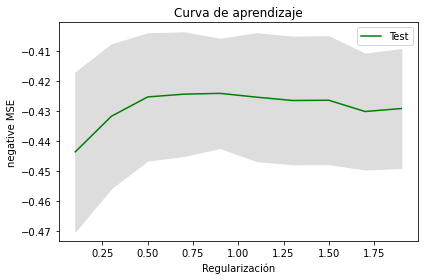

In [82]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

A partir del punto de regularización 0.5 observamos que el error converge en su punto mínimo que es este, por lo que al no mejorar nos quedamos con dicho valor de regularización.

### 5 capas ocultas de 50 neuronas cada una

In [83]:
cv_scores_mean1=[]
cv_scores_std1=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50, 50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=700, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_aux1.values, df1['quality'].values.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean1.append(scores.mean())
    cv_scores_std1.append(scores.std())

cv_scores_mean1, cv_scores_std1

([-0.5760902642830401,
  -0.5320773062823179,
  -0.477263411361343,
  -0.45870515590992644,
  -0.42986772946887497,
  -0.42003471939409753,
  -0.4227851788815011,
  -0.4155365410705357,
  -0.41688183246640254,
  -0.4170192427136687],
 [0.09601702594196712,
  0.05246273313182831,
  0.0350049344157364,
  0.045858131778349374,
  0.03317092905732795,
  0.028656744363238822,
  0.02564379940768721,
  0.022225673615554813,
  0.02161931169377228,
  0.020514122894001455])

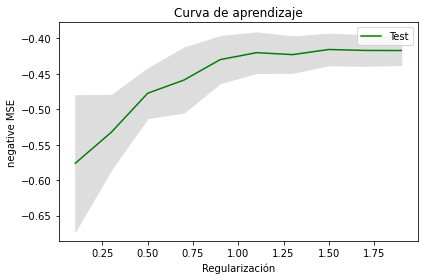

In [84]:
plt.plot(regul_param_range, cv_scores_mean1, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean1) - np.array(cv_scores_std1)
upper_limit = np.array(cv_scores_mean1) + np.array(cv_scores_std1)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

A partir del punto de regularización 1.1 observamos que el error converge en su punto mínimo que es este, por lo que al no mejorar nos quedamos con dicho valor de regularización.

En el perceptrón con una sola capa, el crecimiento de la función es menor (de -0.44 a -0.42) que el que usa 5 capas (de -0.57 a -0.43). También, el perceptrón de 5 capas tarda más en alcanzar el máximo y estabilizarse, por lo que es más volátil. A pesar de esto, el perceptrón de una sola capa al final consigue un valor MSE mayor que el de 5 capas. En ambos casos la desviación típica es similar a la que se ve con otros valores, aunque bastante elevada en general, lo que quiere decir que ha habido bastante variabilidad en cada una de las particiones de la validación cruzada en k partes.

Creemos que el perceptrón más óptimo es el primero, ya que su valor de regularización es menor que el del segundo. Un valor de regularización menor hace que los resultados sean más precisos pero que necesite más tiempo de entrenamiento.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 

In [89]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.5
mlp = MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=700, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, df_aux1.values, df1['quality'].values.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler.inverse_transform(predicts_scaled.reshape(1, -1))

ValueError: operands could not be broadcast together with shapes (1,1599) (6,) (1,1599) 

#### Como se puede observar arriba, hemos tenido problemas con el inverse_transform, por lo que a continuación sacaremos el error sin volver a la escala original.

In [72]:
predicts_scaled

array([-0.61633934, -0.5616551 , -0.38147626, ...,  0.58853178,
       -0.06276688,  0.64848472])

In [96]:
errors = np.abs(df1['quality'] - predicts_scaled) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df1['quality'])

print('Error absoluto medio:', mean_error)
print('Desviación típica:', std_error)
print('Error absoluto medio en % sobre la media:', mean_error/mean_price*100)

Error absoluto medio: 0.5046806621602326
Desviación típica: 0.41284411417179406
Error absoluto medio en % sobre la media: 8.954553692789744


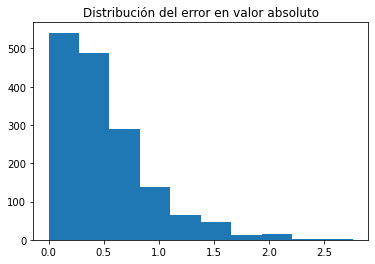

In [94]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors) ## Quitamos el reshape por los problemas que da.

plt.title('Distribución del error en valor absoluto')
plt.show()

Debido a problemas ajenos con el reshape, hemos analizado el error sin devolver los datos a su estado original. Esto hará que los datos no sean precisos pero los analizaremos como si lo fueran.

En cuento al error absoluto, es de 0.5, que lo consideramos alto, y, dado que da medio punto de error a los vinos, no se puede decir que este sea un buen modelo de aprendizaje. El error sobre la media es de un 8%, porcentaje que consideramos demasiado alto. Suponemos que estos valores tan disparados de deben a la falta de re-escalado de los datos. Es un error más alto de lo que nos gustaría para que sea realmente útil consderado.

Estudiando la gráfica vemos que la mayor parte de los errores se encuentran concentrados en la parte izquierda de la gráfica y son pequeños. Sin embargo, la cantidad de errores mayores que se encuentran a la derecha son demasidos y cada vez más elevados. Como ya hemos dicho anteriormente, el error es demasiado grande. 

Al no poder re-escalar no podemos ver las puntuaciones nuevas obtenidas por los vinos. Sin embargo, siguiendo la línea de error que hemos seguidi hasta ahora, podemos predecir un error demasiado alto, de más de medio punto de diferencia, por lo que reiteramos que este modelos no es muy bueno.